# Seaborn: displot

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive

import warnings
warnings.filterwarnings("ignore")

In [2]:
cars = sns.load_dataset('mpg').dropna()

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basics

In [3]:
sns.set_style('white')

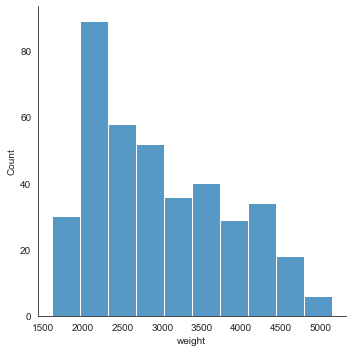

In [4]:
sns.displot(x='weight', data=cars);

### `kde`

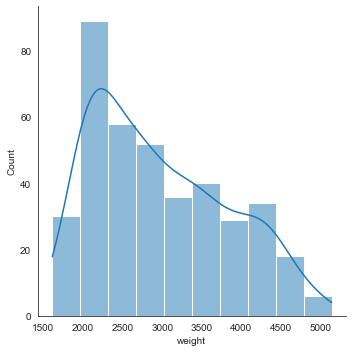

In [5]:
sns.displot(x='weight', data=cars, kde=True);

### `kind` - NEW!

#### Kernel Density Estimation Plot: `kind='kde'`

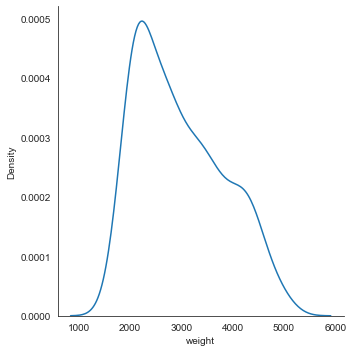

In [6]:
sns.displot(x='weight', data=cars, kind='kde');

#### Empirical Cumulative Distribution Function Plot: `kind='ecdf'`

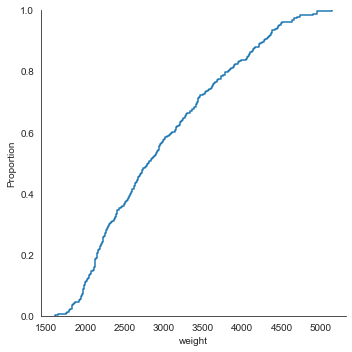

In [7]:
sns.displot(x='weight', data=cars, kind='ecdf');

### `rug`

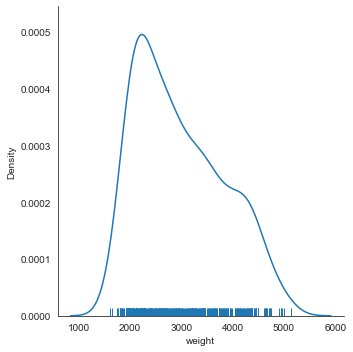

In [8]:
sns.displot(x='weight', data=cars, kind='kde', rug=True);

### Categorical Variables: `hue`

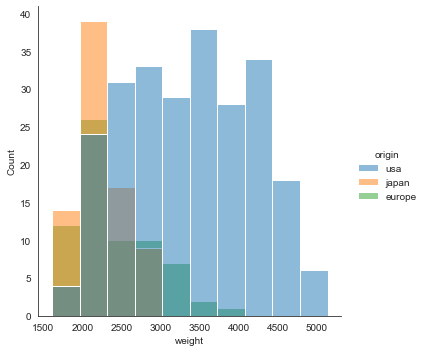

In [9]:
sns.displot(x='weight', data=cars, hue='origin');

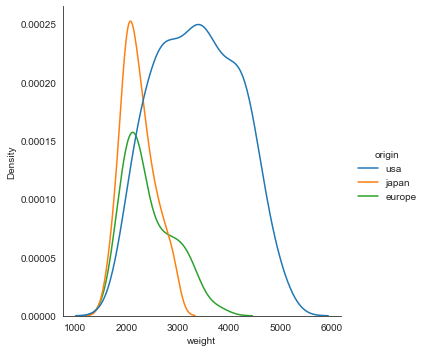

In [10]:
sns.displot(x='weight', data=cars, kind='kde', hue='origin');

## Bivariate (2D) Options - NEW!

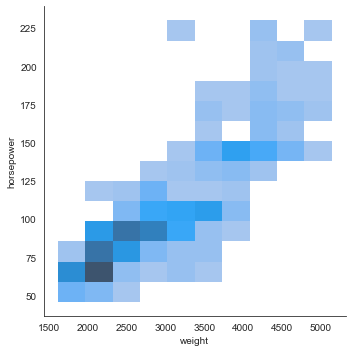

In [11]:
sns.displot(x='weight', y='horsepower', data=cars);

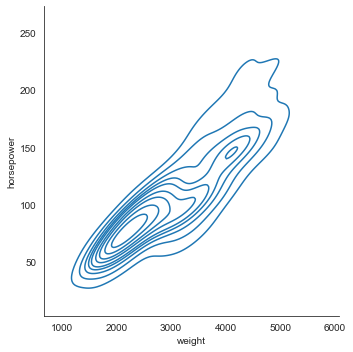

In [12]:
sns.displot(x='weight', y='horsepower', data=cars, kind='kde');

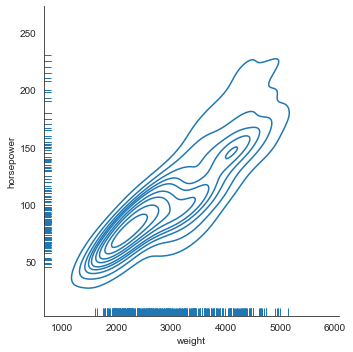

In [13]:
sns.displot(x='weight', y='horsepower', data=cars, kind='kde', rug=True);

## Small Multiples (FacetGrid) - NEW!

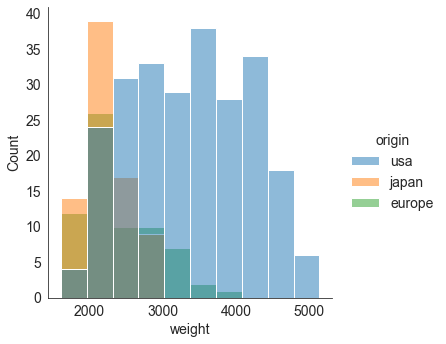

In [33]:
sns.displot(x='weight', data=cars, hue='origin');


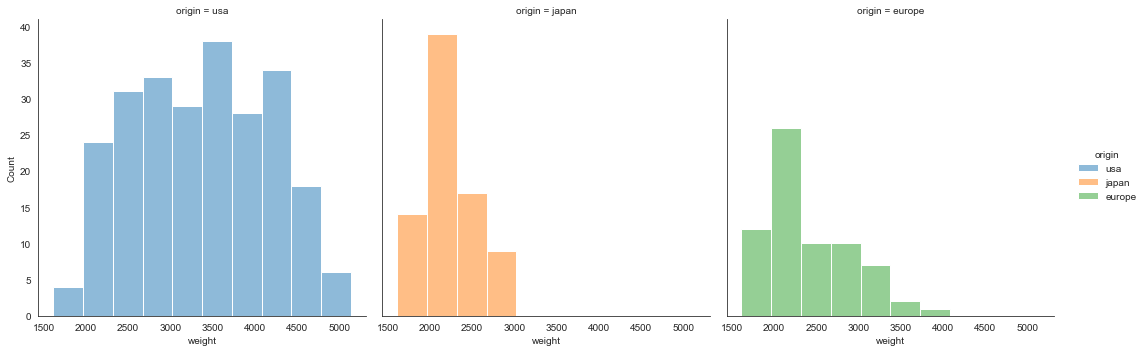

In [14]:
sns.displot(x='weight', data=cars, hue='origin', col='origin');

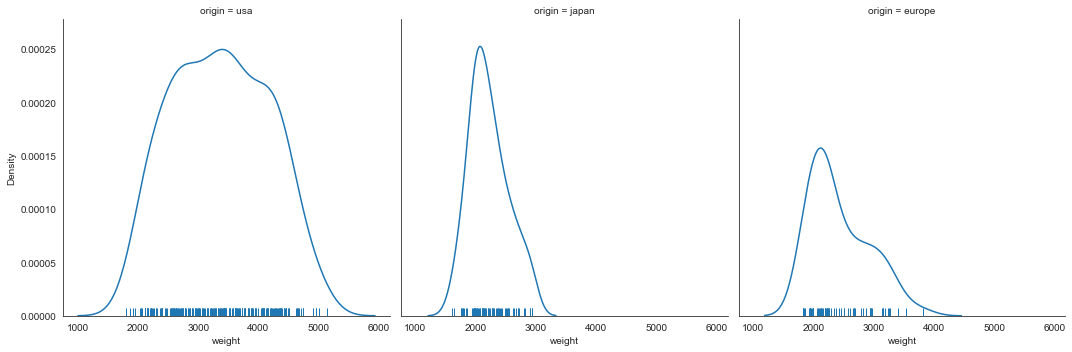

In [15]:
sns.displot(x='weight', data=cars, col='origin', kind='kde', rug=True);

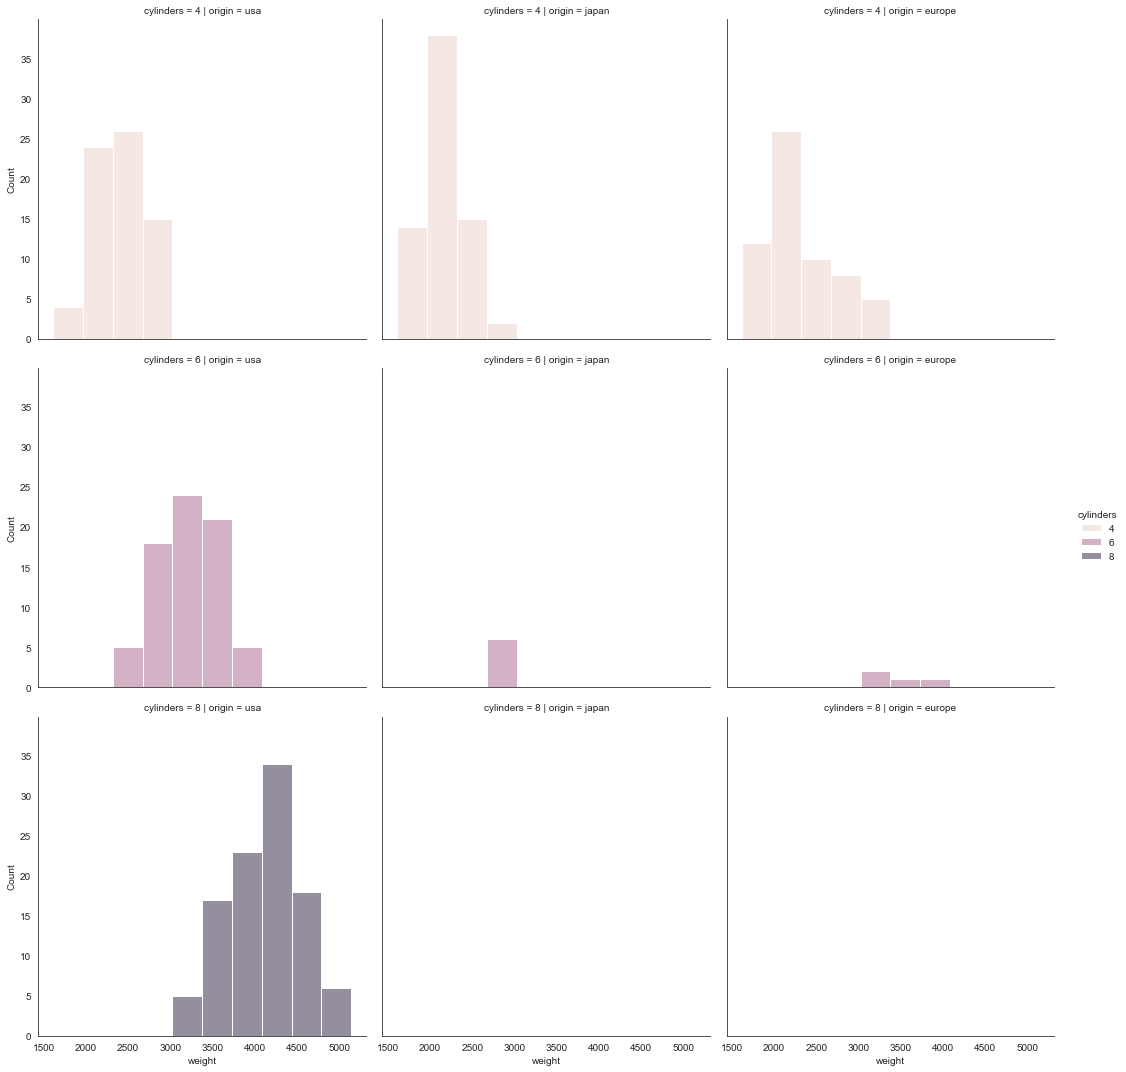

In [16]:
sns.displot(x='weight', data=cars[cars.cylinders.isin([4, 6, 8])], 
            col='origin', 
            row='cylinders', 
            hue='cylinders'
           );

## Styling

### `palette`

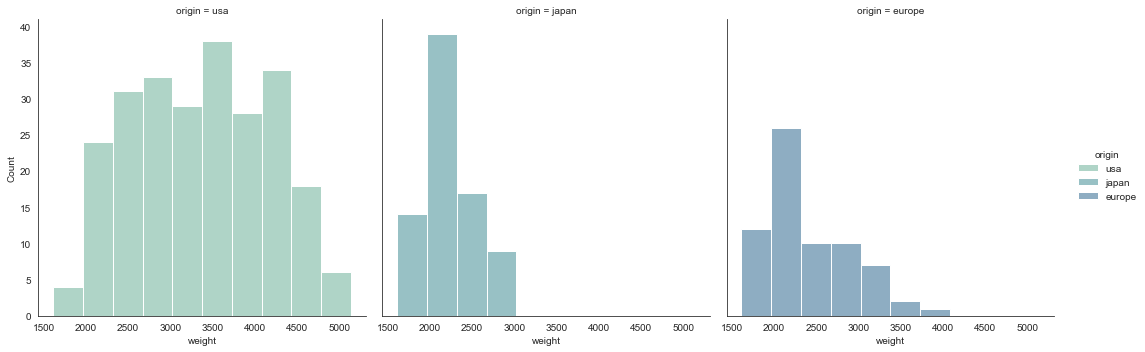

In [17]:
sns.displot(x='weight', data=cars, hue='origin', col='origin', palette='crest');

### `height`, `aspect`

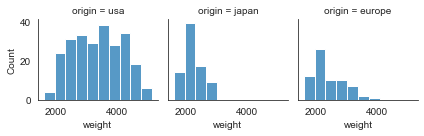

In [18]:
sns.displot(x='weight', data=cars, col='origin', height=2);

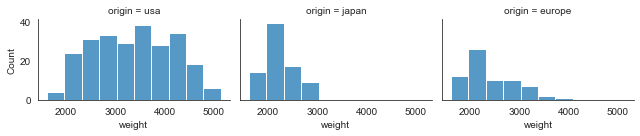

In [19]:
sns.displot(x='weight', data=cars, col='origin', height=2, aspect=1.5);

### Other Keywords: Plot Specific

In general, additional keyword arguments will be passed to the kind of plot selected.  

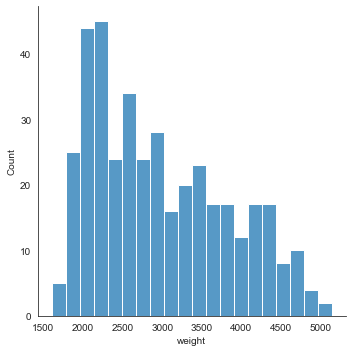

In [20]:
sns.displot(x='weight', data=cars, bins=20);

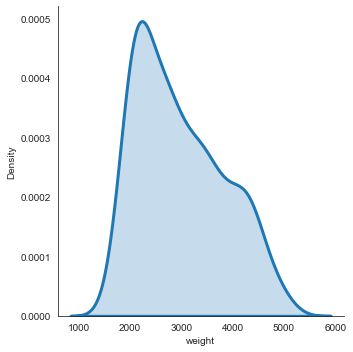

In [21]:
sns.displot(x='weight', data=cars, kind='kde', fill=True, lw=3);

### `rug_kws`

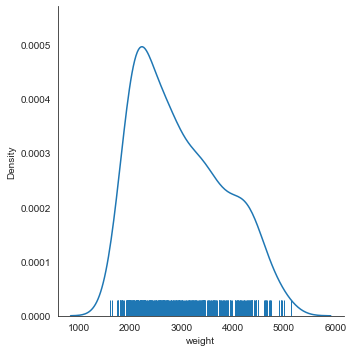

In [22]:
sns.displot(x='weight', data=cars, kind='kde', rug=True, rug_kws={'height': 0.05});

### FacetGrid Styling

#### `facet_kws`

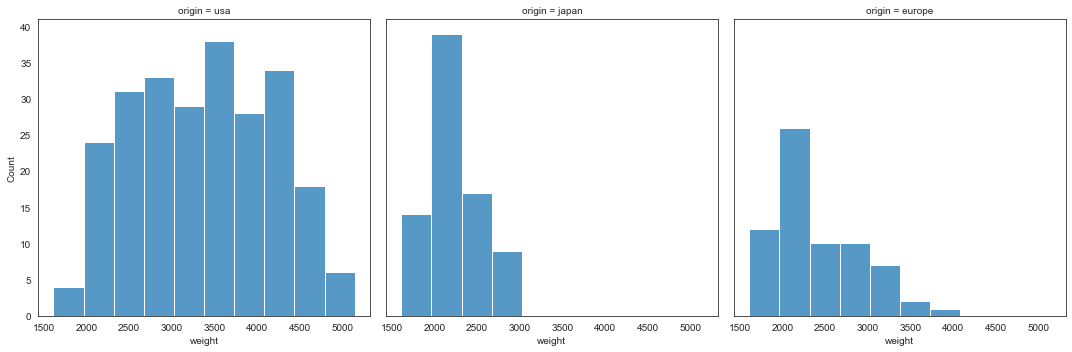

In [23]:
sns.displot(x='weight', data=cars, col='origin', facet_kws={'despine': False});

### FacetGrid Object

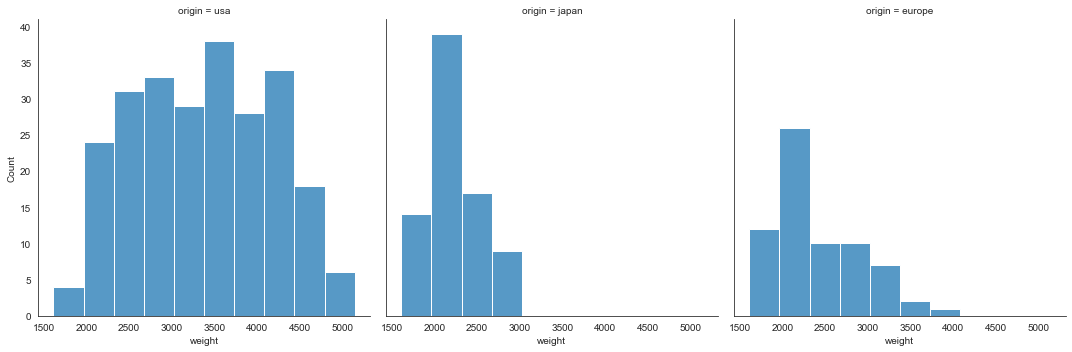

In [24]:
g = sns.displot(x='weight', data=cars, col='origin');

In [25]:
type(g)

seaborn.axisgrid.FacetGrid

In [26]:
g.axes_dict.items()

dict_items([('usa', <AxesSubplot:title={'center':'origin = usa'}, xlabel='weight', ylabel='Count'>), ('japan', <AxesSubplot:title={'center':'origin = japan'}, xlabel='weight'>), ('europe', <AxesSubplot:title={'center':'origin = europe'}, xlabel='weight'>)])

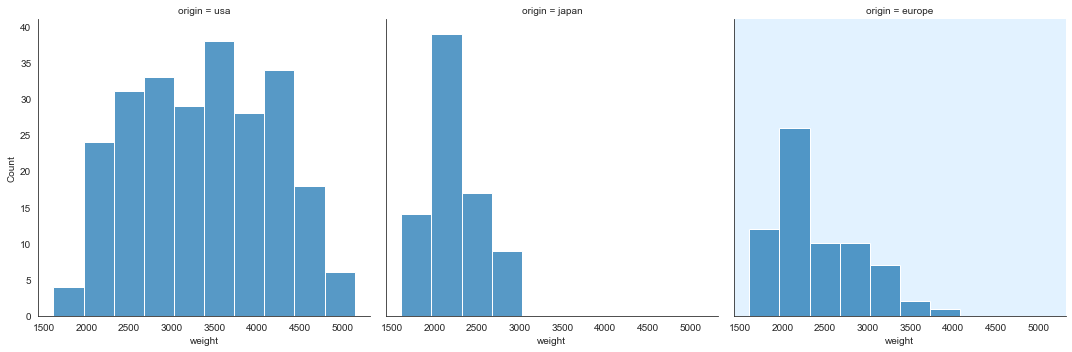

In [27]:
g = sns.displot(x='weight', data=cars, col='origin')

for col_val, ax in g.axes_dict.items():
    if col_val == "europe":
        ax.set_facecolor("#E2F2FF")

## Examples, Thumbnail

In [28]:
from matplotlib import pyplot as plt

plt.rcParams['font.size'] = 14

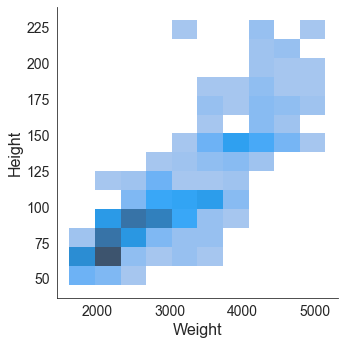

In [29]:
sns.displot(x='weight', y='horsepower', data=cars)
plt.xlabel('Weight', fontsize=16)
plt.ylabel('Height', fontsize=16);

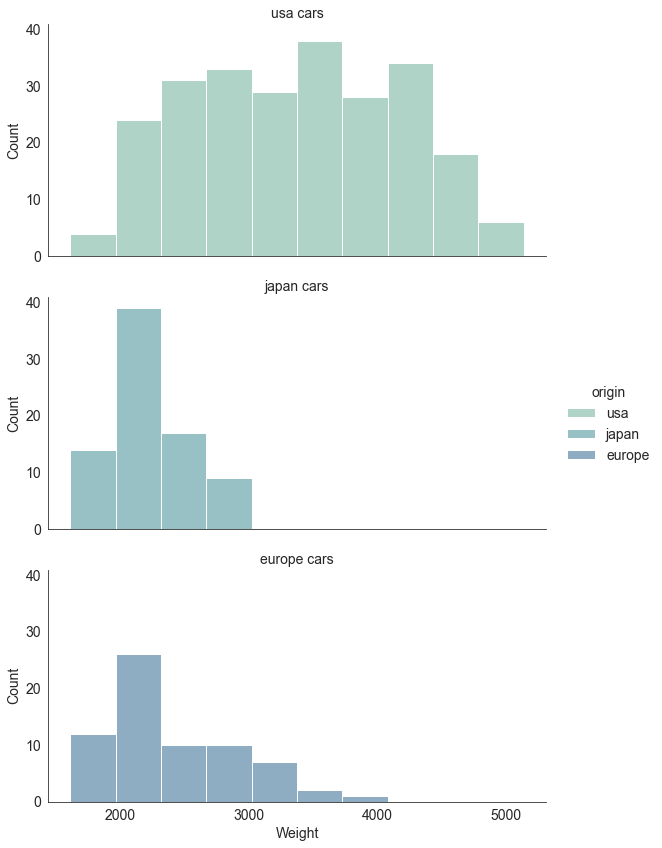

In [30]:
g = sns.displot(x='weight', row='origin', hue='origin', palette='crest', 
            data=cars, height=4, aspect=2)
g.set_titles(row_template='{row_name} cars')
plt.xlabel("Weight")
plt.xticks([2000, 3000, 4000, 5000]);

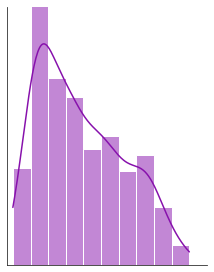

In [31]:
g = sns.displot(x='weight' ,
                color='#8711ac', 
                data=cars, height=4, aspect=0.8, kde=True)
g.set_titles(col_template='')
g.set_xlabels('')
g.set_ylabels('')
g.set_xticklabels([])
g.set_yticklabels([])
plt.xlim(1500, 5500)
plt.ylim(0, 80)
plt.tight_layout();

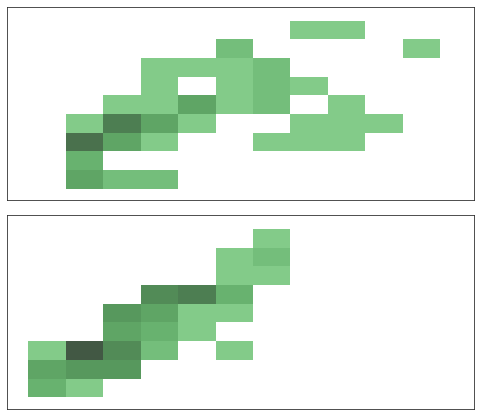

In [32]:
g = sns.displot(x='weight', y='horsepower', row='origin', color='#48804D',
                data=cars[cars.origin.isin(['europe','japan'])], 
                height=3, aspect=2.3, row_order=['europe', 'japan'],
                facet_kws={'despine': False})
g.set_titles(row_template='')
g.set_xlabels('')
g.set_ylabels('')
g.set_xticklabels([])
g.set_yticklabels([])
plt.tight_layout();